In [1]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [2]:
import torchvision.datasets

In [3]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [4]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [5]:
len(y_train), len(y_test)

(60000, 10000)

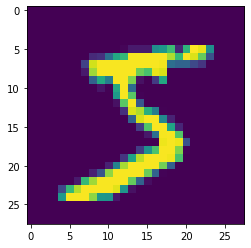

tensor(5)


In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [7]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [8]:
X_train.shape

torch.Size([60000, 1, 28, 28])

In [9]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.Tanh()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.Tanh()
        
        self.fc3   = torch.nn.Linear(84, 10)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x
    
lenet5 = LeNet5()

In [10]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

In [11]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [12]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = lenet5.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    
    print(accuracy)

tensor(0.9759)
tensor(0.9826)
tensor(0.9860)
tensor(0.9869)
tensor(0.9886)
tensor(0.9858)
tensor(0.9883)
tensor(0.9885)
tensor(0.9872)
tensor(0.9876)
tensor(0.9882)
tensor(0.9899)
tensor(0.9877)
tensor(0.9864)
tensor(0.9852)
tensor(0.9890)
tensor(0.9892)
tensor(0.9869)
tensor(0.9884)
tensor(0.9862)
tensor(0.9873)
tensor(0.9896)
tensor(0.9870)
tensor(0.9891)
tensor(0.9879)
tensor(0.9873)
tensor(0.9871)
tensor(0.9893)
tensor(0.9878)
tensor(0.9903)
tensor(0.9887)
tensor(0.9886)
tensor(0.9895)
tensor(0.9890)
tensor(0.9892)
tensor(0.9883)
tensor(0.9878)
tensor(0.9873)
tensor(0.9894)
tensor(0.9894)
tensor(0.9885)
tensor(0.9884)
tensor(0.9888)
tensor(0.9893)
tensor(0.9903)
tensor(0.9872)
tensor(0.9874)
tensor(0.9908)
tensor(0.9904)
tensor(0.9894)
tensor(0.9897)
tensor(0.9891)
tensor(0.9898)
tensor(0.9893)
tensor(0.9892)
tensor(0.9878)
tensor(0.9897)
tensor(0.9874)
tensor(0.9890)
tensor(0.9882)
tensor(0.9898)
tensor(0.9858)
tensor(0.9888)
tensor(0.9890)
tensor(0.9892)
tensor(0.9876)
tensor(0.9

KeyboardInterrupt: ignored

In [13]:
lenet5.forward(X_test)

tensor([[ -4.5060,   1.0910,  -0.7046,  ...,  22.5982,  -7.6657,   2.7690],
        [ -0.1670,  -4.5661,  28.5360,  ...,  -7.2762,   3.9569,   0.3627],
        [ -6.5368,  26.3603,  -0.9003,  ...,   2.3763,   4.2215,  -8.9837],
        ...,
        [ -9.1392,  -2.7139,  -7.4480,  ...,  -0.8813,   0.2401,   4.4944],
        [ -1.8189,  -3.6941, -11.8188,  ...,  -8.1904,   5.4993,  -4.6899],
        [  7.9332,  -5.9846,   0.4464,  ..., -14.6891,   0.3422,  -4.9052]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

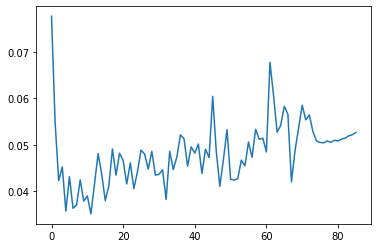

In [14]:
# plt.plot(test_accuracy_history);
plt.plot(test_loss_history);

Задание 1

In [139]:
import torch
import math

N = 4 #Количество картинок в батче
C = 3 #Количество каналов
C_out = 10 #Количество выходных каналов
H = 8 #Высота картинки
W = 16 #Ширина картинки

x = torch.ones((N, C, H, W))

# torch.Size([4, 10, 8, 16])
out1 = torch.nn.Conv2d(C, C_out, kernel_size=(3, 3), padding=1)(x)
print(out1.shape)

# torch.Size([4, 10, 8, 16])
out2 = torch.nn.Conv2d(C, C_out, kernel_size=(5, 5), padding=2)(x)
print(out2.shape)

# torch.Size([4, 10, 8, 16])
out3 = torch.nn.Conv2d(C, C_out, kernel_size=(7, 7), padding=3)(x)
print(out3.shape)

# torch.Size([4, 10, 8, 16])
out4 = torch.nn.Conv2d(C, C_out, kernel_size=(9, 9), padding=4)(x)
print(out4.shape)

# torch.Size([4, 10, 8, 16])
out5 = torch.nn.Conv2d(C, C_out, kernel_size=(3, 5), padding=(1,2))(x)
print(out5.shape)

# torch.Size([4, 10, 22, 30])
out6 = torch.nn.Conv2d(C, C_out, kernel_size=(3, 3), padding=8)(x)
print(out6.shape)

# torch.Size([4, 10, 7, 15])
out7 = torch.nn.Conv2d(C, C_out, kernel_size=(4, 4), padding=1)(x)
print(out7.shape)

# torch.Size([4, 10, 9, 17])
out8 = torch.nn.Conv2d(C, C_out, kernel_size=(2, 2), padding=1)(x)
print(out8.shape)

torch.Size([4, 10, 8, 16])
torch.Size([4, 10, 8, 16])
torch.Size([4, 10, 8, 16])
torch.Size([4, 10, 8, 16])
torch.Size([4, 10, 8, 16])
torch.Size([4, 10, 22, 30])
torch.Size([4, 10, 7, 15])
torch.Size([4, 10, 9, 17])
